In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('//content/gdrive/My Drive/Colab Notebooks/')

In [0]:
#export
from exp.nb_09c import *

##PIL transforms

In [0]:
#export
make_rgb._order=0

In [0]:
path = datasets.untar_data(datasets.URLs.IMAGENETTE)
tfms = [make_rgb, ResizeFixed(128), to_byte_tensor, to_float_tensor]

In [0]:
def get_il(tfms): return ImageList.from_files(path, tfms=tfms)

In [0]:
il = get_il(tfms)

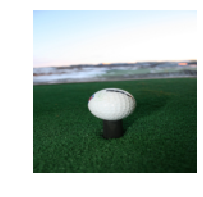

In [7]:
show_image(il[0])

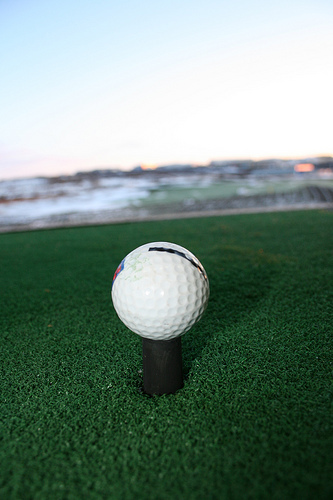

In [9]:
img = PIL.Image.open(il.items[0])
img

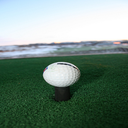

In [10]:
img.resize((128,128),resample=PIL.Image.ANTIALIAS)

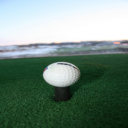

In [11]:
img.resize((128,128),resample=PIL.Image.BILINEAR)

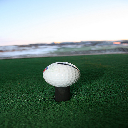

In [13]:
img.resize((128,128),resample=PIL.Image.NEAREST)

In [16]:
%timeit -n 10 img.resize((224,224), resample=PIL.Image.NEAREST)

10 loops, best of 3: 98.1 µs per loop


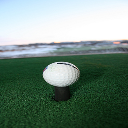

In [15]:
img.resize((256,256),resample=PIL.Image.BICUBIC).resize((128,128),resample=PIL.Image.NEAREST)

###flipping

In [0]:
#export
import random

In [0]:
def pil_random_flip(x):
  return x.transpose(PIL.Image.FLIP_LEFT_RIGHT) if random.random()<0.5 else x

In [0]:
il1 = get_il(tfms)
il1.items = [il1.items[0]]*64
dl = DataLoader(il1,8)

In [0]:
x=next(iter(dl))